# Scrapping diamonds data from 'James Allen' website for our project

### A view of the website:

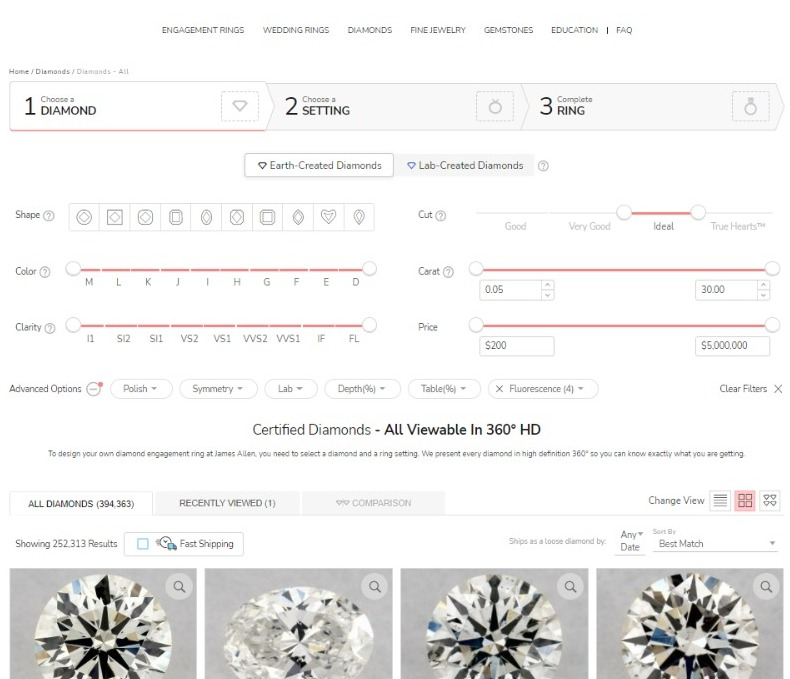

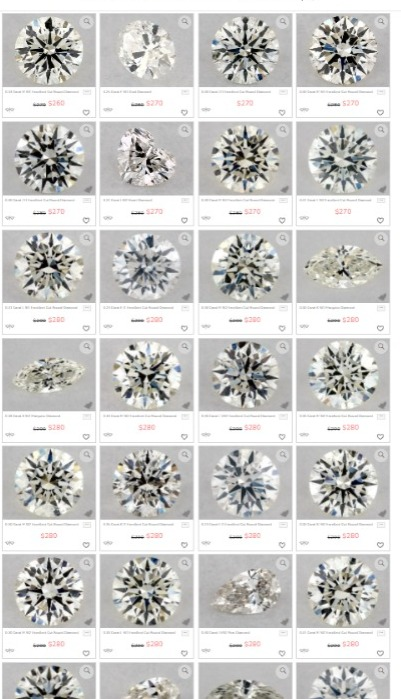

### A view at diamond's information table:

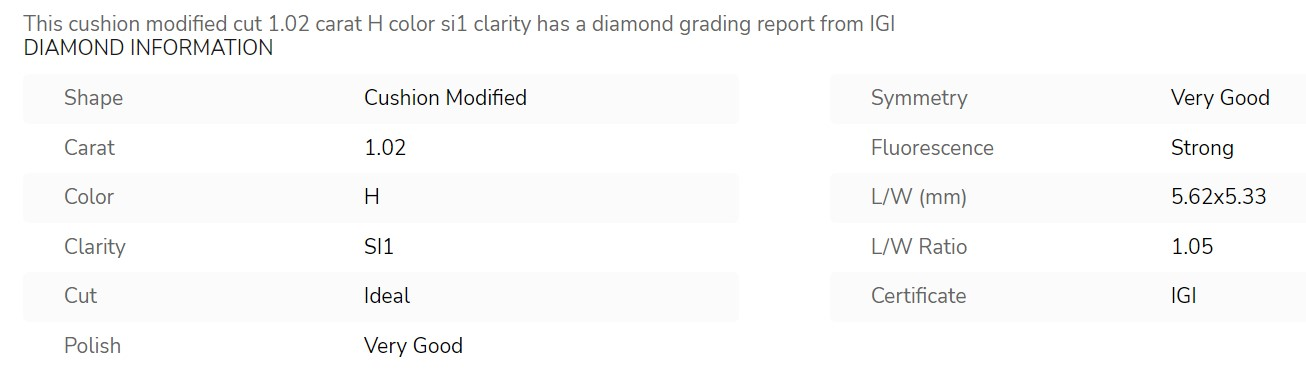

### Import libraries

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import random

In [ ]:
# Creating a function to retrieve data from a diamond's page.

def retrieve_data(page, listing_divs):
    listing_list = []
    #itterate each diamond in the page (there are maximum 23 diamonds in each page)
    for index in range(23):
        each_listing = []
        
        #try to get a specific diamond's data in html
        try:
            current_diamond = listing_divs.select('div[id*=_{page}_{index}]'.format(page=page, index=index))[0]
        except:
            break
        
        #scraping diamond features
        #url
        try:
            url = current_diamond.select('a[class*=image-container]')[0]['href']
            url = 'https://www.jamesallen.com/'+url
            
            #scrapping the diamond's page 
            r = requests.get(url)
            soup = bs(r.content, "html5lib")
        
            #get the diamond's information table
            try:
                data = soup.select('div[class*=tablesContainer]')[0]
            except:
                break
            
            #get the diamond's attributes:
            try:
                carat = data.select('div[data-qa*=stone_carat_value]')[0].string
            except:
                carat = None
            try:
                color = data.select('div[data-qa*=stone_color_value]')[0].string
            except:
                color = None
            try:
                clarity = data.select('div[data-qa*=stone_clarity_value]')[0].string
            except:
                clarity = None
            try:
                cut = data.select('div[data-qa*=stone_cut_value]')[0].string
            except:
                cut = None
            try:
                polish = data.select('div[data-qa*=stone_polish_value]')[0].string
            except:
                polish = None
            try:    
                shape = data.select('div[data-qa*=stone_shape_value]')[0].string
            except:
                shape = None
            try:
                symmetry = data.select('div[data-qa*=stone_symmetry_value]')[0].string
            except:
                symmetry = None
            try:
                fluorescence = data.select('div[data-qa*=stone_fluorescence_value]')[0].string
            except:
                fluorescence = None
            try:
                lw = data.select('div[data-qa*=stone_lw_value]')[0].string
            except:
                lw = None
            try:
                lw_ratio = data.select('div[data-qa*=stone_lw_ratio_value]')[0].string
            except:
                lw_ratio = None
            try:
                certificate = data.select('div[data-qa*=stone_certificate_value]')[0].string
            except:
                certificate = None
                
            #we scrapped the price from the original page 
            price = current_diamond.select('div[class*=salePrice]')
            if len(price)==0:
                price = current_diamond.select('div[class*=price]')
            price = price[0].string
            
            #appending the diamond's attributes to the list
            each_listing.append(url)
            each_listing.append(carat)
            each_listing.append(color)
            each_listing.append(clarity)
            each_listing.append(cut)
            each_listing.append(polish)
            each_listing.append(shape)
            each_listing.append(symmetry)
            each_listing.append(fluorescence)
            each_listing.append(lw)
            each_listing.append(lw_ratio)
            each_listing.append(certificate)
            each_listing.append(price)

            listing_list.append(each_listing)
        
        
        except:
            break   
            
    #return the list of all the diamonds in this page
    return listing_list

In [ ]:
#scraping random pages from price range.
# this function goes through the range of the prices (from 200-100000) and genarate random pages for scraping

def scrape(prices):
    #the beginning of the url
    url_prefix = 'http://www.jamesallen.com/loose-diamonds/all-diamonds/page-'

    #a loop which generate a random page in a range of 200 dollar price     
    for start_price in prices:
    
        print('scraping page number' + str(start_price//200) + '...(price range : $' + str(start_price) + '-$' + str(start_price+200) + ')')
        
        #generate a random number
        random_page = random.randint(1,20) ## there are maximum 20 pages in each search.
        
        #generate the url: 
        #special case for the first page(the url is a little different)
        if random_page==1:
            target_page ='http://www.jamesallen.com/loose-diamonds/all-diamonds/?Color=M,L,K,J,I,H,G,F,E,D&Cut=Good,Very+Good,Ideal,TrueHearts&Shape=all-diamonds&Clarity=I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF,FL&PriceFrom=' + str(start_price)+ '&PriceTo=' + str(start_price+200)+ '&CaratFrom=0.05'
        #other pages
        else:
            target_page = url_prefix + str(random_page) + '/?Color=M,L,K,J,I,H,G,F,E,D&Cut=Good,Very+Good,Ideal,TrueHearts&Shape=all-diamonds&Clarity=I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF,FL&PriceFrom=' + str(start_price)+ '&PriceTo=' + str(start_price+200)+ '&CaratFrom=0.05'
        
        #scrapping the page html
        r = requests.get(target_page)
 
        # Getting a BeautifulSoup instance to be able to retrieve data
        soup = bs(r.content, "html5lib")
         
        #get the diamonds in this page
        listing_divs = soup.find('div', attrs={'id':'data-page-container'})
        
        #in case this page doent exit/empty try the first page in this search
        if listing_divs == None:
            print('This random generated page did not found, lets try to scrape the first page...')
            random_page=1
            r = requests.get('http://www.jamesallen.com/loose-diamonds/all-diamonds/?Color=M,L,K,J,I,H,G,F,E,D&Cut=Good,Very+Good,Ideal,TrueHearts&Shape=all-diamonds&Clarity=I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF,FL&PriceFrom=' + str(start_price)+ '&PriceTo=' + str(start_price+200)+ '&CaratFrom=0.05')
            # Getting a BeautifulSoup instance to be able to retrieve data
            soup = bs(r.content, "html5lib")
            listing_divs = soup.find('div', attrs={'id':'data-page-container'})
            #in case the 1st page doent exit/empty continue to the next price range
            if listing_divs == None:
                continue
 
        #now we have a page with data, let's send it to retrieve_data fun to get the infos of this page's diamonds
        one_page_parsed = retrieve_data(random_page, listing_divs)

        #create a dataframe from the data and add it to our local csv file
        df = pd.DataFrame(one_page_parsed, columns=['url','carat','color','clarity','cut', 'polish', 'shape', 'symmetry', 'fluorescence', 'lw', 'lw_ratio','certificate', 'price'])
        df.to_csv('scraped_Diamonds', mode='a', header=False)

In [ ]:
#creating a local csv file in our computer with the column labels
file = pd.DataFrame(columns=['url','carat','color','clarity','cut', 'polish', 'shape', 'symmetry', 'fluorescence', 'lw', 'lw_ratio','certificate', 'price'])
file.to_csv('scraped_Diamonds')

In [ ]:
#creating a list of prices with skips of 200 dollars
prices = [i for i in range(200, 100001, 200)] ##diamonds till 100,000 dollars.

In [ ]:
#start scraping
scrape(prices)